In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df=pd.read_csv('HIGHSPEEDDIESEL.csv')

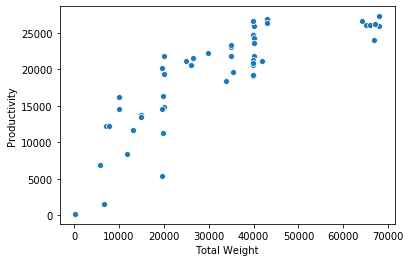

In [6]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [7]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.00000,50.0,50.000000,50.000000,50.00000,45.000000
mean,247.220000,193536.0000,38.314800,51.963400,32290.486940,0.323600,0.03236,0.0,0.229200,11.905000,19135.87160,46439.326667
std,113.702313,3354.7789,20.006341,39.795705,18395.013814,0.183801,0.01838,0.0,1.035888,30.257819,6755.54087,13604.365780
min,2.000000,190933.0000,0.000000,0.000000,200.000000,0.000000,0.00000,0.0,0.000000,0.000000,176.47000,25196.000000
25%,226.500000,191565.7500,27.482500,30.672500,19602.404750,0.200000,0.02000,0.0,0.000000,0.000000,14688.10750,40425.000000
50%,274.500000,192186.5000,37.650000,40.205000,34953.863000,0.350000,0.03500,0.0,0.000000,0.000000,21056.91500,43060.000000
75%,311.750000,192839.0000,46.250000,65.347500,40053.175750,0.400000,0.04000,0.0,0.000000,0.000000,24285.77750,47621.000000
max,472.000000,200922.0000,106.200000,215.850000,68000.000000,0.680000,0.06800,0.0,5.600000,153.200000,27290.97000,95605.000000


In [8]:
df=df[df['Productivity']>2500]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,43.000000
mean,249.583333,193595.958333,37.698750,51.794167,33491.966958,0.335625,0.033563,0.0,0.238750,12.305625,19897.932083,46706.062791
std,110.445487,3411.923124,16.959143,38.946018,17761.418523,0.177415,0.017742,0.0,1.056598,30.824885,5721.270890,13864.594579
min,2.000000,190933.000000,0.000000,0.000000,5886.540000,0.060000,0.006000,0.0,0.000000,0.000000,5341.770000,25196.000000
25%,229.500000,191543.500000,28.047500,30.857500,19740.956750,0.200000,0.020000,0.0,0.000000,0.000000,15880.892500,40935.000000
50%,274.500000,192218.500000,37.650000,40.205000,34988.361000,0.350000,0.035000,0.0,0.000000,0.000000,21183.340000,43276.000000
75%,311.250000,192885.500000,45.950000,62.482500,40065.610000,0.400000,0.040000,0.0,0.000000,0.000000,24444.497500,47750.500000
max,472.000000,200922.000000,88.000000,215.850000,68000.000000,0.680000,0.068000,0.0,5.600000,153.200000,27290.970000,95605.000000


In [9]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(lm.intercept_)

11001.33011900929


In [12]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.267131


In [13]:
predictions = lm.predict(X_test)

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 2024.7862445335547
MSE: 6209631.595751851
RMSE: 2491.9132400129524
r2_score: 0.6914718791635557


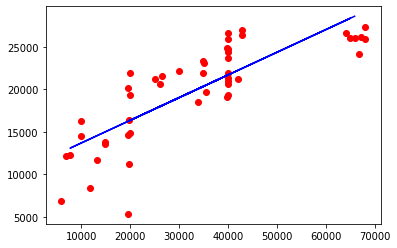

In [15]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [16]:
joblib.dump(lm,"High_Speed_Diesel.pkl")#only execute if rmse is less than half of mean of productivity

['High_Speed_Diesel.pkl']